# Logistic Regression : Marketing Campaign of a Portuguese Bank.

The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [149]:
import os


import pandas as pd
pd.set_option('display.max_column',None)


import warnings
warnings.filterwarnings('ignore')


import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr


import sklearn
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_predict, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [75]:
df = pd.read_csv(r'D:\Uddhav\DATA SCIENCE\ML PROJECTS\Logistic regression\Banking\banking.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,222,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,196,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,62,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [77]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [78]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

## Data Exploration

### Target Variable : y

In [79]:
df.y

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [80]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

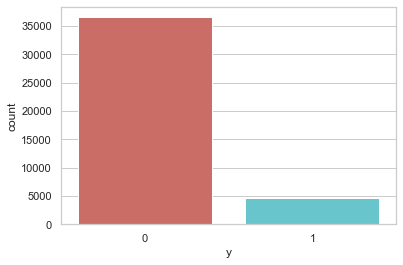

In [81]:
sns.countplot(df.y, palette='hls')

### Calculation % of Subsciption Taken and Not in Target 

In [82]:
count_no_sub = len(df[df['y']==0])
count_sub = len(df[df['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


There is a huge imbalance in our target variable

In [83]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


1. On an average people with higher age tends to take subsciption as compared to lower age.
2. On an average the prople who have taken subscription have lower pdays (Days Past after last call).
3. Number of contact performed for those who have taken subsciption is comparetively more.

### 1. Age

In [84]:
df.age

0        44
1        53
2        28
3        39
4        55
         ..
41183    59
41184    31
41185    42
41186    48
41187    25
Name: age, Length: 41188, dtype: int64

In [85]:
df.age.value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

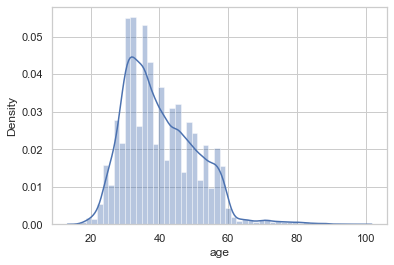

In [86]:
sns.distplot(df.age)

<AxesSubplot:xlabel='age'>

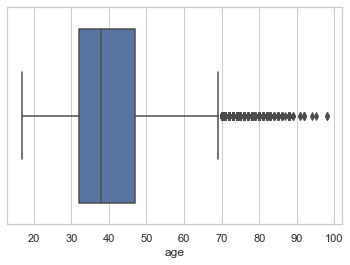

In [87]:
sns.boxplot(df.age)

In [88]:
df.groupby('age').mean()

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,,,,,,,,,,
17,420.000000,2.200000,401.600000,1.800000,-3.000000,92.247000,-30.500000,0.846600,5064.460000,0.400000
18,321.785714,1.321429,680.142857,0.750000,-2.282143,93.166750,-37.953571,1.026393,5034.467857,0.428571
19,271.500000,2.285714,809.785714,0.666667,-1.869048,93.224119,-42.397619,1.242238,5063.307143,0.476190
20,288.492308,2.353846,861.400000,0.630769,-1.607692,93.257077,-39.515385,1.672508,5080.141538,0.353846
21,264.245098,2.029412,892.117647,0.284314,-1.434314,93.334422,-40.829412,1.866980,5088.063725,0.284314
...,...,...,...,...,...,...,...,...,...,...
91,530.000000,1.500000,999.000000,1.000000,-3.400000,92.379000,-29.800000,0.781000,5017.500000,0.000000
92,527.500000,1.500000,252.750000,2.000000,-1.750000,93.951500,-39.150000,0.796750,5000.150000,0.750000
94,134.000000,1.000000,999.000000,1.000000,-3.400000,92.649000,-30.100000,0.716000,5017.500000,0.000000


People with higher age comparetively buy the subscription more than that of lower.

In [89]:
corr,_ = pearsonr(df.age, df.y)
print('Pearsons Correlation: %.3f'%corr)

Pearsons Correlation: 0.030


#### On performing correlation age has low correlation of 3% with the subscription bought or not

### 2. Job

In [90]:
df.job

0        blue-collar
1         technician
2         management
3           services
4            retired
            ...     
41183        retired
41184      housemaid
41185         admin.
41186     technician
41187        student
Name: job, Length: 41188, dtype: object

In [91]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [92]:
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


Text(0.5, 1.0, 'Count of subscription According to Job Title')

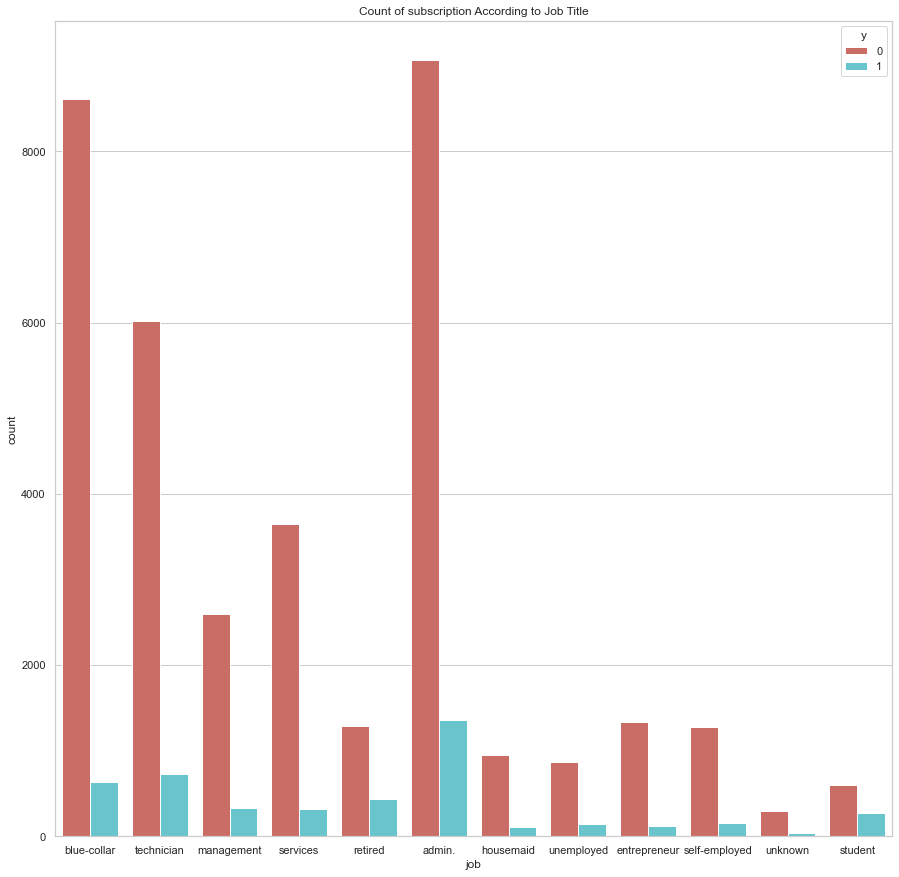

In [93]:
fig, ax = plt.subplots(figsize = (15,15)) 
sns.countplot(x=df.job, hue=df.y, palette='hls')
plt.title('Count of subscription According to Job Title')

The job title of a person is affecting the rate on subscription being bought.

In [94]:
cross = pd.crosstab(df.job, df.y)
cross

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [95]:
chi2_contingency(cross, correction=False)

(961.2424403289555,
 4.189763287563623e-199,
 11,
 array([[9247.91822861, 1174.08177139],
        [8211.49830048, 1042.50169952],
        [1291.97552685,  164.02447315],
        [ 940.58657862,  119.41342138],
        [2594.59920365,  329.40079635],
        [1526.23482568,  193.76517432],
        [1260.91842284,  160.08157716],
        [3521.87559483,  447.12440517],
        [ 776.42760027,   98.57239973],
        [5983.37292415,  759.62707585],
        [ 899.76867049,  114.23132951],
        [ 292.82412353,   37.17587647]]))

#### According to the P-Value Job Title tends to be a good variable.

## 3. Marital

In [96]:
df.marital

0        married
1        married
2         single
3        married
4        married
          ...   
41183    married
41184    married
41185     single
41186    married
41187     single
Name: marital, Length: 41188, dtype: object

In [97]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [98]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


Text(0.5, 1.0, 'Subscription according to marital status')

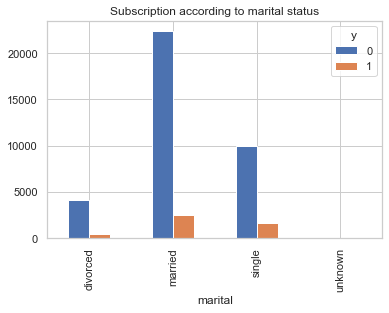

In [99]:
pd.crosstab(df.marital, df.y).plot(kind='bar')
plt.title('Subscription according to marital status')

Married and singles tends to buy more subscription compared to others.

In [100]:
cross = pd.crosstab(df.marital, df.y)
cross

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [101]:
chi2_contingency(cross, correction=False)

(122.65515182252989,
 2.068014648442211e-26,
 3,
 array([[4.09243896e+03, 5.19561037e+02],
        [2.21197568e+04, 2.80824318e+03],
        [1.02648165e+04, 1.30318345e+03],
        [7.09876663e+01, 9.01233369e+00]]))

## 4. education

In [102]:
df.education

0                   basic.4y
1                    unknown
2          university.degree
3                high.school
4                   basic.4y
                ...         
41183            high.school
41184               basic.4y
41185      university.degree
41186    professional.course
41187            high.school
Name: education, Length: 41188, dtype: object

In [103]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

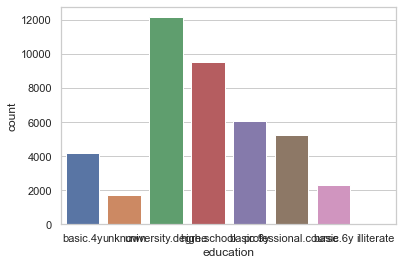

In [104]:
sns.countplot(df.education)

<AxesSubplot:xlabel='education'>

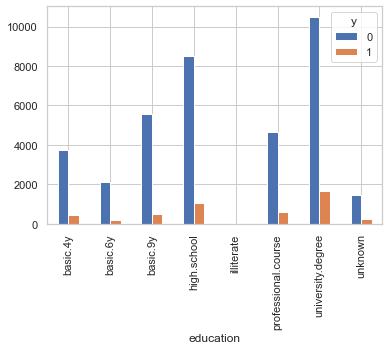

In [105]:
pd.crosstab(df.education, df.y).plot(kind='bar')

In [106]:
cross = pd.crosstab(df.education, df.y)
cross

y,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [107]:
chi2_contingency(cross, correction=False)

(193.10590454149565,
 3.3051890144025054e-38,
 7,
 array([[3.70555618e+03, 4.70443819e+02],
        [2.03379664e+03, 2.58203360e+02],
        [5.36400554e+03, 6.80994464e+02],
        [8.44309556e+03, 1.07190444e+03],
        [1.59722249e+01, 2.02777508e+00],
        [4.65235418e+03, 5.90645819e+02],
        [1.07972240e+04, 1.37077595e+03],
        [1.53599563e+03, 1.95004370e+02]]))

In [108]:
tukey = pairwise_tukeyhsd(df.y, df.education, alpha = 0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
           basic.4y            basic.6y  -0.0205  0.197 -0.0453 0.0044  False
           basic.4y            basic.9y  -0.0242 0.0034 -0.0435 -0.005   True
           basic.4y         high.school   0.0059    0.9 -0.0119 0.0236  False
           basic.4y          illiterate   0.1197 0.7188 -0.1061 0.3456  False
           basic.4y professional.course    0.011 0.6749 -0.0088 0.0308  False
           basic.4y   university.degree   0.0348  0.001  0.0176 0.0519   True
           basic.4y             unknown   0.0425  0.001  0.0152 0.0698   True
           basic.6y            basic.9y  -0.0038    0.9 -0.0272 0.0197  False
           basic.6y         high.school   0.0263  0.008  0.0041 0.0486   True
           basic.6y          illiterate   0.1402 0.5566 -0.0861 

Combining all the basic.4y, basic.6y, basic.9y to Basic 

In [109]:
df.education = np.where(df.education == 'basic.9y','basic', df.education)
df.education = np.where(df.education == 'basic.6y','basic', df.education)
df.education = np.where(df.education == 'basic.4y','basic', df.education)

In [110]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [111]:
tukey = pairwise_tukeyhsd(df.y, df.education, alpha = 0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
              basic         high.school   0.0213  0.001  0.0091 0.0336   True
              basic          illiterate   0.1352 0.4566 -0.0769 0.3473  False
              basic professional.course   0.0265  0.001  0.0117 0.0412   True
              basic   university.degree   0.0502  0.001  0.0388 0.0617   True
              basic             unknown    0.058  0.001  0.0349  0.081   True
        high.school          illiterate   0.1139 0.6255 -0.0983  0.326  False
        high.school professional.course   0.0051    0.9 -0.0103 0.0206  False
        high.school   university.degree   0.0289  0.001  0.0166 0.0412   True
        high.school             unknown   0.0366  0.001  0.0132 0.0601   True
         illiterate professional.course  -0.1087 0.6659  -0.321 

## 5. default

In [112]:
df.default

0        unknown
1             no
2             no
3             no
4             no
          ...   
41183    unknown
41184    unknown
41185    unknown
41186         no
41187         no
Name: default, Length: 41188, dtype: object

In [113]:
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [114]:
df.groupby(df.default).mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
default,,,,,,,,,,,
no,39.140635,259.842549,2.520744,954.787130,0.199030,-0.082168,93.525639,-40.565469,3.447246,5159.990214,0.12879
unknown,43.371990,252.435035,2.745609,991.606258,0.074096,0.703466,93.765365,-40.265139,4.280654,5193.725951,0.05153
yes,42.333333,103.333333,1.333333,999.000000,0.333333,0.900000,93.362667,-38.066667,4.693000,5217.333333,0.00000


<AxesSubplot:xlabel='default'>

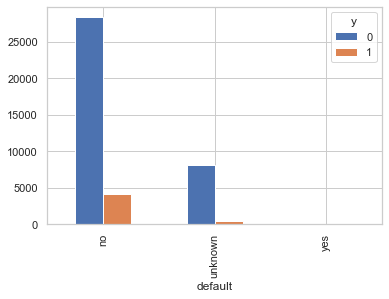

In [115]:
pd.crosstab(df.default, df.y).plot(kind='bar')

# Creating Dummy Variables

In [116]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data=df.join(cat_list)
    df=data

In [117]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [118]:
df_final=df[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [119]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

## Dropping Original Variables

In [120]:
df.drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], 
        axis=1, inplace=True)

In [121]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

# Over sampling using SMOTE (Synthetic Minority Oversampling Technique)

In [124]:
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns


os_df_X,os_df_y=os.fit_sample(X_train, y_train)
os_df_X = pd.DataFrame(df=os_df_X,columns=columns )
os_df_y= pd.DataFrame(df=os_df_y,columns=['y'])


# we can Check the numbers of our data
print("length of oversampled data is ",len(os_df_X))
print("Number of no subscription in oversampled data",len(os_df_y[os_df_y['y']==0]))
print("Number of subscription",len(os_df_y[os_df_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_df_y[os_df_y['y']==0])/len(os_df_X))
print("Proportion of subscription data in oversampled data is ",len(os_df_y[os_df_y['y']==1])/len(os_df_X))

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [133]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [137]:
not_default = df[df.y==0]
len(not_default)

36548

In [138]:
default = df[df.y==1]
len(not_default)

36548

In [139]:
default_unsampled1 = resample(default,
                             replace = True,
                             n_samples = len(not_default),
                             random_state=0)

In [141]:
unsampled1 = pd.concat([not_default, default_unsampled1])
unsampled1.y.value_counts()

0    36548
1    36548
Name: y, dtype: int64

# Feature Selection

In [152]:
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

os = SMOTE(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [154]:
df_final_vars=df_final.columns.values.tolist()
y=['y']
X=[i for i in df_final_vars if i not in y]

logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[38 36 33 40 32 30 29 37 21 34 15  8  9 11 14 19 13 12 18 10 16 17  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 22 24 25 27 26
 35 20 23 39 28  1  1  1  1  1  7  6 31]


In [155]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

In [156]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455664
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.343     
Dependent Variable:   y                 AIC:               46639.8230
Date:                 2022-01-08 01:30  BIC:               46816.6671
No. Observations:     51134             Log-Likelihood:    -23300.   
Df Model:             19                LL-Null:           -35443.   
Df Residuals:         51114             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1612   0.0082  19.7747 0.0000  0.1452  0.1772
job_blue-collar 

In [157]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.547516
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.210     
Dependent Variable:   y                 AIC:               56025.3883
Date:                 2022-01-08 01:31  BIC:               56166.8635
No. Observations:     51134             Log-Likelihood:    -27997.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1726   0.0055  31.1231 0.0000  0.1617  0.1835
job_blue-collar 

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [160]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [161]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6850  816]
 [1710 5965]]


In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      7666
           1       0.88      0.78      0.83      7675

    accuracy                           0.84     15341
   macro avg       0.84      0.84      0.83     15341
weighted avg       0.84      0.84      0.83     15341



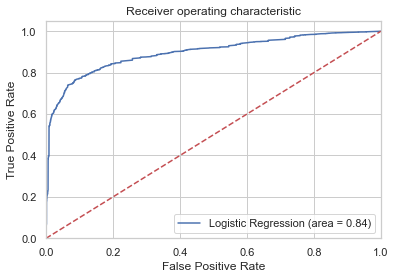

In [163]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()